To illustrate how to integrate a differentiable simulator into the REINFORCE algorithm, we will construct a simple reinforcement learning setup using PyTorch. The differentiable simulator will model the dynamics of the environment and compute the gradients for policy updates. Below is a step-by-step code example.

s_{t+1} = s_t + a_t

C:\Users\mjafa\AppData\Local\Temp\ipykernel_18248\3635465689.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state_tensor = torch.tensor(state, dtype=torch.float32)


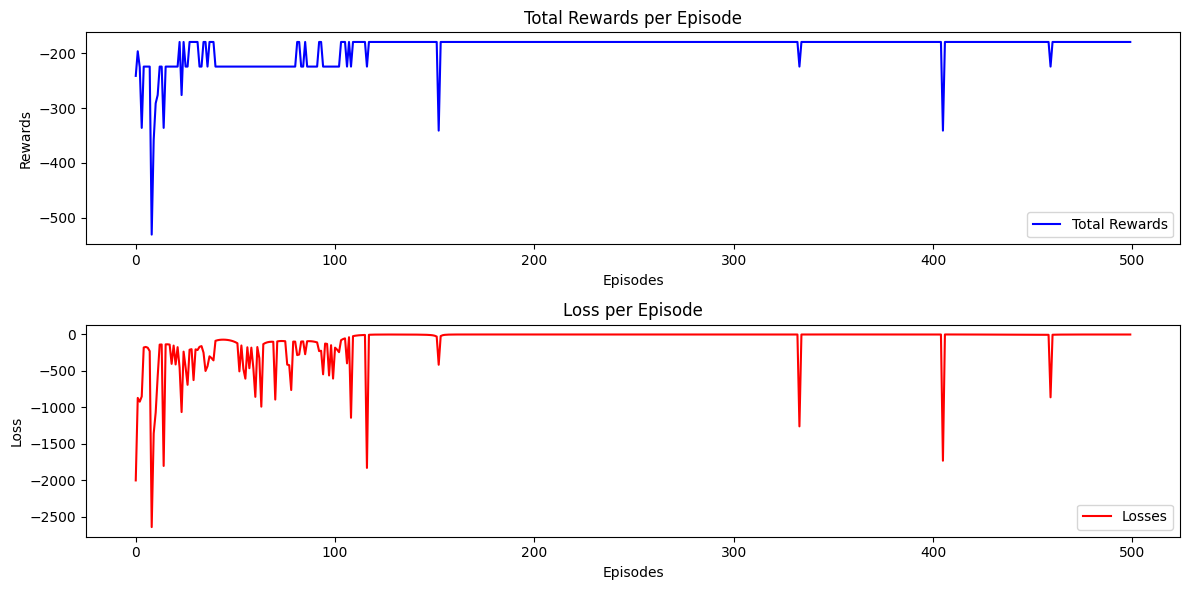

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the differentiable simulator
class DifferentiableSimulator:
    def __init__(self):
        pass

    def step(self, state, action):
        # Simple dynamics: next_state = state + action (for example)
        next_state = state + action
        return next_state

# Define the policy network
class PolicyNetwork(nn.Module):
    def __init__(self, state_size, action_size):
        super(PolicyNetwork, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(state_size, 128),
            nn.ReLU(),
            nn.Linear(128, action_size),
            nn.Softmax(dim=-1)  # Output probabilities for actions
        )

    def forward(self, x):
        return self.fc(x)

# Define the REINFORCE algorithm
def reinforce(env, policy_net, num_episodes, optimizer):
    rewards_per_episode = []  # Store total rewards for each episode
    losses_per_episode = []  # Store losses for each episode
    
    for episode in range(num_episodes):
        state = env.reset()  # Reset environment to get initial state
        rewards = []
        log_probs = []

        # Collect trajectories
        done = False
        while not done:
            state_tensor = torch.tensor(state, dtype=torch.float32)
            action_probs = policy_net(state_tensor)
            action = torch.multinomial(action_probs, 1).item()

            # Take action and step through the simulator
            next_state = simulator.step(state_tensor, action)  # Use the differentiable simulator
            reward = env.get_reward(state, action)  # Get the reward from the environment

            rewards.append(reward)
            log_probs.append(torch.log(action_probs[action]))

            state = next_state
            done = env.is_done(state)

        # Compute returns and update policy
        returns = compute_returns(rewards)
        loss = -torch.sum(torch.stack(log_probs) * returns)  # Policy gradient loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Record average reward and loss
        total_reward = sum(rewards)
        rewards_per_episode.append(total_reward)
        losses_per_episode.append(loss.item())

    return rewards_per_episode, losses_per_episode

def compute_returns(rewards, gamma=0.99):
    returns = []
    G = 0
    for r in reversed(rewards):
        G = r + gamma * G
        returns.insert(0, G)
    return torch.tensor(returns, dtype=torch.float32)

# Define a simple environment for demonstration
class SimpleEnv:
    def reset(self):
        return torch.tensor([0.0])  # Starting state

    def get_reward(self, state, action):
        # Reward based on the state and action
        return -((state.item() + action) ** 2)  # Example: negative squared distance from target 0

    def is_done(self, state):
        return abs(state.item()) > 10  # Example termination condition

# Main execution
if __name__ == "__main__":
    env = SimpleEnv()
    state_size = 1  # Dimension of state
    action_size = 5  # Discrete actions [0, 1, 2, 3, 4]

    # Initialize policy network and optimizer
    policy_net = PolicyNetwork(state_size, action_size)
    optimizer = optim.Adam(policy_net.parameters(), lr=0.01)

    # Initialize the differentiable simulator
    simulator = DifferentiableSimulator()

    # Run the REINFORCE algorithm
    num_episodes = 500
    rewards, losses = reinforce(env, policy_net, num_episodes, optimizer)

    # Plot the rewards and losses
    plt.figure(figsize=(12, 6))

    # Plot total rewards
    plt.subplot(2, 1, 1)
    plt.plot(rewards, label='Total Rewards', color='blue')
    plt.xlabel('Episodes')
    plt.ylabel('Rewards')
    plt.title('Total Rewards per Episode')
    plt.legend()

    # Plot losses
    plt.subplot(2, 1, 2)
    plt.plot(losses, label='Losses', color='red')
    plt.xlabel('Episodes')
    plt.ylabel('Loss')
    plt.title('Loss per Episode')
    plt.legend()

    plt.tight_layout()
    plt.show()


<img src="DiffSim_REINFORCE.jpg" alt="DiffSim REINFORCE" width="500"/>